# Visualisations for Web App

In [1]:
import os
import joblib
import pandas as pd
import skops.io as sio
import plotly.express as px

from helpers import TRANSFORMED_DATA_DIR, ENCODER_MODEL_DIR, FORECAST_MODEL_DIR

In [2]:
df_transactions = pd.read_parquet(TRANSFORMED_DATA_DIR / 'transactions_KL_ckpt7_integrated.parquet')
df_transactions.head()

,township,building_type,tenure,floors,rooms,land_area,built_up,price_psf,price,year,...,median_income,mean_income,n_households,wellbeing_index,money_supply_millions,unemployment_rate,population_thousands,n_crimes,date,interest_rate
34996,SENTOSA COURT,APARTMENT,LEASEHOLD,1.0,3.000000,1015.0,1015.0,128.0,129888.0,2000.0,...,3006.666667,4379.74,299566.666667,100.0,458363.1,3.0,1416.0,8770.0,2000-01-01,5.5
34997,SENTOSA COURT,APARTMENT,LEASEHOLD,1.0,3.000000,1007.0,1007.0,122.0,122888.0,2000.0,...,3006.666667,4379.74,299566.666667,100.0,458363.1,3.0,1416.0,8770.0,2000-01-01,5.5
34998,SENTOSA COURT,APARTMENT,LEASEHOLD,1.0,3.000000,1015.0,1015.0,122.0,123888.0,2000.0,...,3006.666667,4379.74,299566.666667,100.0,458363.1,3.0,1416.0,8770.0,2000-01-02,5.5
34999,BANDAR BARU SRI PETALING,TERRACE HOUSE - INTERMEDIATE,LEASEHOLD,2.0,2.000000,753.0,672.0,120.0,90000.0,2000.0,...,3006.666667,4379.74,299566.666667,100.0,458363.1,3.0,1416.0,8770.0,2000-01-02,5.5
35000,BUKIT BANDARAYA,TERRACE HOUSE - INTERMEDIATE,FREEHOLD,1.0,3.078282,1875.0,1126.0,180.0,338000.0,2000.0,...,3006.666667,4379.74,299566.666667,100.0,458363.1,3.0,1416.0,8770.0,2000-01-02,5.5


## Market overview visualisation

Input:
1. In-sample forecast length
2. Out-of-sample forecast length

Output:
1. Mean price psf with in-sample and out-sample forecast
2. Median price psf with in-sample and out-sample forecast

In [3]:
df_monthly_price_psf = df_transactions[['year', 'month', 'price_psf']]
df_monthly_price_psf['year_month'] = pd.to_datetime(df_monthly_price_psf[['year', 'month']].assign(day=1))
df_monthly_price_psf

C:\Users\USER\AppData\Local\Temp\ipykernel_19852\1632924374.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_monthly_price_psf['year_month'] = pd.to_datetime(df_monthly_price_psf[['year', 'month']].assign(day=1))


,year,month,price_psf,year_month
34996,2000.0,1.0,128.0,2000-01-01
34997,2000.0,1.0,122.0,2000-01-01
34998,2000.0,1.0,122.0,2000-01-01
34999,2000.0,1.0,120.0,2000-01-01
35000,2000.0,1.0,180.0,2000-01-01
...,...,...,...,...
265265,2023.0,6.0,342.0,2023-06-01
265266,2023.0,6.0,347.0,2023-06-01
265267,2023.0,6.0,500.0,2023-06-01
265268,2023.0,6.0,443.0,2023-06-01


Number of months from 2000 to 2020: 252
Length of grouped dataframe: 282


<Axes: title={'center': 'Mean and Median Price per Square Feet per Month'}, xlabel='year_month'>

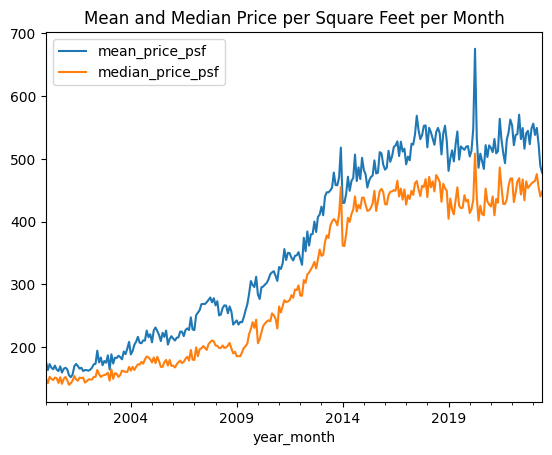

In [4]:
mean_monthly_price_psf = df_monthly_price_psf[['year_month', 'price_psf']].groupby('year_month').mean()
median_monthly_price_psf = df_monthly_price_psf[['year_month', 'price_psf']].groupby('year_month').median()

df_price_psf_per_month = pd.concat([mean_monthly_price_psf, median_monthly_price_psf], axis=1)
df_price_psf_per_month.columns = ['mean_price_psf', 'median_price_psf']

print(f'Number of months from 2000 to 2020: {12 * 21}')
print(f'Length of grouped dataframe: {len(df_price_psf_per_month)}')

df_price_psf_per_month.plot(
    kind='line',
    title='Mean and Median Price per Square Feet per Month',
)

In [5]:
df_price_psf_per_month.to_parquet(TRANSFORMED_DATA_DIR / 'monthly_price_psf.parquet')

In [6]:
px.line(
    df_price_psf_per_month,
    title='Mean and Median Price per Square Feet per Month',
    labels={
        'year_month': 'Year-Month',
        'mean_price_psf': 'Mean Price per Square Feet (RM)',
        'median_price_psf': 'Median Price per Square Feet (RM)',
    },
    color_discrete_sequence=['#636EFA', '#EF553B'],
    width=1200,
    height=600,
).update_layout(
    legend=dict(
        orientation='h',
        yanchor='bottom',
        y=1.02,
        xanchor='right',
        x=1,
    ),
).show()

d:\Repos\GitHub\time-series-house-price-forecasting\venv\Lib\site-packages\_plotly_utils\basevalidators.py:105: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  v = v.dt.to_pydatetime()


In [7]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

def get_forecast(data, order, in_sample_forecast_length=12, out_sample_forecast_length=12):

    train = data.iloc[:-in_sample_forecast_length]
    val = data.iloc[-in_sample_forecast_length:]
    total_forecast_length = in_sample_forecast_length + out_sample_forecast_length

    model = SARIMAX(train, order=order, freq=train.index.inferred_freq)

    model = model.fit()
    model_forecast = model.get_forecast(total_forecast_length).summary_frame()

    return model_forecast['mean'], model_forecast['mean_ci_lower'], model_forecast['mean_ci_upper']

In [8]:
mean_sarimax_best_order = (2, 2, 4)

mean_monthly_price_psf = df_price_psf_per_month['mean_price_psf']
mean_forecast, mean_ci_lower, mean_ci_upper = get_forecast(mean_monthly_price_psf, mean_sarimax_best_order)

d:\Repos\GitHub\time-series-house-price-forecasting\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



In [9]:
median_sarimax_best_order = (3, 1, 1)

median_monthly_price_psf = df_price_psf_per_month['median_price_psf']
median_forecast, median_ci_lower, median_ci_upper = get_forecast(median_monthly_price_psf, median_sarimax_best_order)

d:\Repos\GitHub\time-series-house-price-forecasting\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



In [10]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

def plot_price_psf_forecast(mean_monthly_price_psf, mean_forecast, mean_ci_lower, mean_ci_upper, median_monthly_price_psf, median_forecast, median_ci_lower, median_ci_upper):
    # Create Plotly figure with subplots
    fig = make_subplots(rows=1, cols=1, subplot_titles=["Mean and Median Monthly Price PSF with Prediction Intervals in Kuala Lumpur"])

    # Plot first time series and prediction interval
    fig.add_trace(go.Scatter(x=mean_monthly_price_psf.index, y=mean_monthly_price_psf, mode='lines', name='Mean Price PSF'))
    fig.add_trace(go.Scatter(x=mean_forecast.index, y=mean_forecast, mode='lines', name='Forecasted Mean'))
    fig.add_trace(go.Scatter(x=mean_forecast.index, y=mean_ci_lower, fill=None, mode='lines', line=dict(color='rgba(0,0,255,0)')))
    fig.add_trace(go.Scatter(x=mean_forecast.index, y=mean_ci_upper, fill='tonexty', mode='lines', line=dict(color='rgba(0,0,255,0.2)'), name=' Mean Price PSF Prediction Interval'))

    # Plot second time series and prediction interval
    fig.add_trace(go.Scatter(x=median_monthly_price_psf.index, y=median_monthly_price_psf, mode='lines', name='Median Price PSF'))
    fig.add_trace(go.Scatter(x=median_forecast.index, y=median_forecast, mode='lines', name='Forecasted Median'))
    fig.add_trace(go.Scatter(x=median_forecast.index, y=median_ci_lower, fill=None, mode='lines', line=dict(color='rgba(255,0,0,0)')))
    fig.add_trace(go.Scatter(x=median_forecast.index, y=median_ci_upper, fill='tonexty', mode='lines', line=dict(color='rgba(255,0,0,0.2)'), name='Median Pricew PSF Prediction Interval'))

    # Update layout
    fig.update_layout(xaxis_title="Date", yaxis_title="Price per Square Feet (RM)", legend_title="Legend")

    # Show plot
    fig.show()

In [11]:
plot_price_psf_forecast(mean_monthly_price_psf, mean_forecast, mean_ci_lower, mean_ci_upper, median_monthly_price_psf, median_forecast, median_ci_lower, median_ci_upper)

In [12]:
# Input
in_sample_forecast_length = 30
out_sample_forecast_length = 12

# Preset based on analysis
mean_sarimax_best_order = (2, 2, 4)
median_sarimax_best_order = (3, 1, 1)

# Input data
mean_monthly_price_psf = df_price_psf_per_month['mean_price_psf']
median_monthly_price_psf = df_price_psf_per_month['median_price_psf']

mean_forecast, mean_ci_lower, mean_ci_upper = get_forecast(mean_monthly_price_psf, mean_sarimax_best_order, in_sample_forecast_length, out_sample_forecast_length)
median_forecast, median_ci_lower, median_ci_upper = get_forecast(median_monthly_price_psf, median_sarimax_best_order, in_sample_forecast_length, out_sample_forecast_length)
plot_price_psf_forecast(mean_monthly_price_psf, mean_forecast, mean_ci_lower, mean_ci_upper, median_monthly_price_psf, median_forecast, median_ci_lower, median_ci_upper)

d:\Repos\GitHub\time-series-house-price-forecasting\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

d:\Repos\GitHub\time-series-house-price-forecasting\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



## Price Forecast

Input:
- Required:
    - township
    - building_type
    - tenure
    - floors
    - rooms
    - land_area
    - built_up
    - date (year, month, day)
- Optional:
    - cpi
    - median_income
    - mean_income
    - n_households
    - wellbeing_index
    - money_supply_millions
    - unemployment_rate
    - population_thousands
    - n_crimes
    - interest_rate

Output:
- Forecasted price psf for current date
- Forecasted price psf for the next 12 months
- Price valuation based on forecasted current date price psf x built up area
- Price valuation based on forecasted next 12 months price psf x built up area
- Price valuation based on forecasted current date price psf x land area
- Price valuation based on forecasted next 12 months price psf x land area

However, the original encoder has `price_psf` and `price` in its feature, while user input does not have these two features. Therefore, we need to create a new encoder that does not have these two features.

In [183]:
import datetime as dt

# Required
township = 'BANDAR BARU SRI PETALING'
building_type = 'APARTMENT'
tenure_type = 'FREEHOLD'
floors = 1
rooms = 3
land_area_sqft = 900.0
built_up_sqft = 900.0
date = dt.datetime(2023, 7, 1)

# Optional
interest_rate = 3.0
cpi = 123.08
n_households = 526075
mean_income = 13613.61
median_income = 10762.87
wellbeing_index = 122.15
money_supply_millions = 2040993
unemployment_rate = 3.5
population_thousands = 2000
crime_rate = 846

In [184]:
input_required = {
        'township': [township],
        'building_type': [building_type],
        'tenure': [tenure_type],
        'floors': [floors],
        'rooms': [rooms],
        'land_area': [land_area_sqft],
        'built_up': [built_up_sqft],
        'date': [date],
    }

input_optional = {
        'cpi': [cpi],
        'median_income': [median_income],
        'mean_income': [mean_income],
        'n_households': [n_households],
        'wellbeing_index': [wellbeing_index],
        'money_supply_millions': [money_supply_millions],
        'unemployment_rate': [unemployment_rate],
        'population_thousands': [population_thousands],
        'crime_rate': [crime_rate],
        'interest_rate': [interest_rate],
    }

df_input_required = pd.DataFrame({**input_required})
df_input_required.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   township       1 non-null      object        
 1   building_type  1 non-null      object        
 2   tenure         1 non-null      object        
 3   floors         1 non-null      int64         
 4   rooms          1 non-null      int64         
 5   land_area      1 non-null      float64       
 6   built_up       1 non-null      float64       
 7   date           1 non-null      datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 196.0+ bytes


In [185]:
num_repeats = 10

df_input_required = pd.concat([df_input_required] * num_repeats)
df_input_required['date'] = pd.date_range(start=date, periods=num_repeats, freq='MS')
df_input_required

,township,building_type,tenure,floors,rooms,land_area,built_up,date
0,BANDAR BARU SRI PETALING,APARTMENT,FREEHOLD,1,3,900.0,900.0,2023-07-01
0,BANDAR BARU SRI PETALING,APARTMENT,FREEHOLD,1,3,900.0,900.0,2023-08-01
0,BANDAR BARU SRI PETALING,APARTMENT,FREEHOLD,1,3,900.0,900.0,2023-09-01
0,BANDAR BARU SRI PETALING,APARTMENT,FREEHOLD,1,3,900.0,900.0,2023-10-01
0,BANDAR BARU SRI PETALING,APARTMENT,FREEHOLD,1,3,900.0,900.0,2023-11-01
0,BANDAR BARU SRI PETALING,APARTMENT,FREEHOLD,1,3,900.0,900.0,2023-12-01
0,BANDAR BARU SRI PETALING,APARTMENT,FREEHOLD,1,3,900.0,900.0,2024-01-01
0,BANDAR BARU SRI PETALING,APARTMENT,FREEHOLD,1,3,900.0,900.0,2024-02-01
0,BANDAR BARU SRI PETALING,APARTMENT,FREEHOLD,1,3,900.0,900.0,2024-03-01
0,BANDAR BARU SRI PETALING,APARTMENT,FREEHOLD,1,3,900.0,900.0,2024-04-01


In [186]:
df_input_required['township'] = df_input_required['township'].astype('category')
df_input_required['building_type'] = df_input_required['building_type'].astype('category')
df_input_required['tenure'] = df_input_required['tenure'].astype('category')
df_input_required['date'] = pd.to_datetime(df_input_required['date'], yearfirst=True)
df_input_required['year'] = df_input_required['date'].dt.year
df_input_required['month'] = df_input_required['date'].dt.month
df_input_required['day'] = df_input_required['date'].dt.day

df_input_required

,township,building_type,tenure,floors,rooms,land_area,built_up,date,year,month,day
0,BANDAR BARU SRI PETALING,APARTMENT,FREEHOLD,1,3,900.0,900.0,2023-07-01,2023,7,1
0,BANDAR BARU SRI PETALING,APARTMENT,FREEHOLD,1,3,900.0,900.0,2023-08-01,2023,8,1
0,BANDAR BARU SRI PETALING,APARTMENT,FREEHOLD,1,3,900.0,900.0,2023-09-01,2023,9,1
0,BANDAR BARU SRI PETALING,APARTMENT,FREEHOLD,1,3,900.0,900.0,2023-10-01,2023,10,1
0,BANDAR BARU SRI PETALING,APARTMENT,FREEHOLD,1,3,900.0,900.0,2023-11-01,2023,11,1
0,BANDAR BARU SRI PETALING,APARTMENT,FREEHOLD,1,3,900.0,900.0,2023-12-01,2023,12,1
0,BANDAR BARU SRI PETALING,APARTMENT,FREEHOLD,1,3,900.0,900.0,2024-01-01,2024,1,1
0,BANDAR BARU SRI PETALING,APARTMENT,FREEHOLD,1,3,900.0,900.0,2024-02-01,2024,2,1
0,BANDAR BARU SRI PETALING,APARTMENT,FREEHOLD,1,3,900.0,900.0,2024-03-01,2024,3,1
0,BANDAR BARU SRI PETALING,APARTMENT,FREEHOLD,1,3,900.0,900.0,2024-04-01,2024,4,1


In [187]:
# Encode
encoder_path = ENCODER_MODEL_DIR / 'one_hot_encoder_township_building_type_tenure.joblib'

if os.path.exists(encoder_path):
    ohe = joblib.load(encoder_path)
else:
    raise Exception(f'Encoder not found at {encoder_path}')

df_encoded = ohe.transform(df_input_required.drop(columns=['date']))
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 0 to 0
Columns: 1903 entries, township_BANDAR BARU SRI PETALING to day
dtypes: float64(2), int32(3), int64(1898)
memory usage: 148.6 KB


d:\Repos\GitHub\time-series-house-price-forecasting\venv\Lib\site-packages\category_encoders\utils.py:50: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

d:\Repos\GitHub\time-series-house-price-forecasting\venv\Lib\site-packages\category_encoders\utils.py:50: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

d:\Repos\GitHub\time-series-house-price-forecasting\venv\Lib\site-packages\category_encoders\utils.py:50: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



In [188]:
# Combine required input with optional input
df_input = pd.concat([pd.DataFrame({**input_optional}), df_encoded], axis=1)
df_input.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 0 to 0
Columns: 1913 entries, cpi to day
dtypes: float64(8), int32(3), int64(1902)
memory usage: 149.4 KB


In [189]:
# Drop land_area
df_input = df_input.drop(columns=['land_area'])
df_input.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 0 to 0
Columns: 1912 entries, cpi to day
dtypes: float64(7), int32(3), int64(1902)
memory usage: 149.3 KB


In [190]:
# Scale with Standard Scaler
ml_scaler_path = FORECAST_MODEL_DIR / 'mlp_forecasting_scaler.skops'

if os.path.exists(ml_scaler_path):
    scaler = sio.load(ml_scaler_path, trusted=True)
else:
    raise Exception(f'Scaler not found at {ml_scaler_path}')

input_scaled = scaler.transform(df_input.to_numpy())
print(input_scaled.shape)

(10, 1912)


In [191]:
# Predict with MLP
ml_model_path = FORECAST_MODEL_DIR / 'mlp_10_lr001_iter100_forecasting.skops'

if os.path.exists(ml_model_path):
    ml_model = sio.load(ml_model_path, trusted=True)
else:
    raise Exception(f'ML model not found at {ml_model_path}')

mlp_forecast = ml_model.predict(input_scaled)

# Price valuation
mlp_forecast

array([634.95426255, 637.89545386, 640.83664516, 643.77783646,
       646.71902777, 649.66021907, 617.48161314, 620.42280444,
       623.36399574, 626.30518705])

In [192]:
# Make it into a function
def forecast_price_psf(input_required: dict, input_optional: dict):

    df_input_required = pd.DataFrame({**input_required})

    encoder_path = ENCODER_MODEL_DIR / 'one_hot_encoder_township_building_type_tenure.joblib'

    if os.path.exists(encoder_path):
        ohe = joblib.load(encoder_path)
    else:
        raise Exception(f'Encoder not found at {encoder_path}')

    df_encoded = ohe.transform(df_input_required)
    df_input = pd.concat([pd.DataFrame({**input_optional}), df_encoded], axis=1)
    df_input = df_input.drop(columns=['land_area'])
    
    ml_scaler_path = FORECAST_MODEL_DIR / 'mlp_forecasting_scaler.skops'

    if os.path.exists(ml_scaler_path):
        scaler = sio.load(ml_scaler_path, trusted=True)
    else:
        raise Exception(f'Scaler not found at {ml_scaler_path}')

    input_scaled = scaler.transform(df_input.to_numpy())

    ml_model_path = FORECAST_MODEL_DIR / 'mlp_10_lr001_iter100_forecasting.skops'

    if os.path.exists(ml_model_path):
        ml_model = sio.load(ml_model_path, trusted=True)
    else:
        raise Exception(f'ML model not found at {ml_model_path}')

    mlp_forecast = ml_model.predict(input_scaled)

    return mlp_forecast

In [199]:
df_historical = df_transactions[['date', 'price_psf']]
df_historical['type'] = 'Historical'
df_historical.head()

C:\Users\USER\AppData\Local\Temp\ipykernel_19852\1773000124.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,date,price_psf,type
34996,2000-01-01,128.0,Historical
34997,2000-01-01,122.0,Historical
34998,2000-01-02,122.0,Historical
34999,2000-01-02,120.0,Historical
35000,2000-01-02,180.0,Historical


In [200]:
df_forecast = pd.DataFrame({'date': df_input_required['date'], 'price_psf': mlp_forecast}).reset_index(drop=True)
df_forecast.loc[0, 'type'] = 'Current'
df_forecast.loc[1:, 'type'] = 'Future'
df_forecast.head()

C:\Users\USER\AppData\Local\Temp\ipykernel_19852\2790775245.py:2: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Current' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.



,date,price_psf,type
0,2023-07-01,634.954263,Current
1,2023-08-01,637.895454,Future
2,2023-09-01,640.836645,Future
3,2023-10-01,643.777836,Future
4,2023-11-01,646.719028,Future


In [201]:
combined_df = pd.concat([df_historical, df_forecast], ignore_index=True)
combined_df = combined_df[-10000:]

In [202]:
fig = make_subplots(specs=[[{"secondary_y": True}]])

color_map = {'Historical': '#EF553B', 'Current': '#636EFA', 'Future': '#00CC96'}
# Create a scatter plot with Plotly

for type in combined_df['type'].unique():
    subset_df = combined_df[combined_df['type'] == type]
    fig.add_trace(go.Scatter(x=subset_df['date'], y=subset_df['price_psf'],
                             mode='markers', marker=dict(color=color_map[type]),
                             name=f'{type}'))
# Line plot for mean price
fig.add_trace(
    go.Scatter(x=mean_monthly_price_psf.index, y=mean_monthly_price_psf.values,
        mode='lines', line=dict(color='black'), name='Mean Price'), 
    secondary_y=True
)

# Line plot for median price
fig.add_trace(
    go.Scatter(x=median_monthly_price_psf.index, y=median_monthly_price_psf.values,
        mode='lines', line=dict(color='purple'), name='Median Price'),
    secondary_y=True
)

# Set labels and title
fig.update_layout(title='Price per Square Foot over Time',
                  xaxis_title='Date',
                  yaxis_title='Price per Square Foot')

# Set x-axis limits based on the first and last date in combined_df
first_date = combined_df['date'].min()
last_date = combined_df['date'].max()
fig.update_xaxes(range=[first_date, last_date])

# Show the plot
fig.show()

d:\Repos\GitHub\time-series-house-price-forecasting\venv\Lib\site-packages\_plotly_utils\basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

